In [6]:
import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [14]:
class Perceptron:
    
    def __init__(self,eta=0.1,n_iter = 500,seed = 0):
        '''
        eta:学习lv
        n_iter:迭代次数，查找真正合适的权重
        seed:随机数种子
        '''
        self.eta = eta
        self.n_iter = n_iter
        self.seed = seed
    def fit(self,X,Y):
        '''
        X:输入，shape = [n_samples,n_features]
        Y:目标值，shape = [n_samples]
            target values
        
        '''
        rgen = np.random.RandomState(self.seed) # 随机数生成器
        self.w_ = rgen.normal(loc = 0.0,scale = 0.01,size=1+X.shape[1])  # 权重w_[0]为偏置项
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi,target in zip(X,Y):
                update = self.eta * (target - self.perdict(xi))   # delta w 更新权重
                self.w_[1:] += update*xi   # 给权重重新赋值
                self.w_[0] += update        # 这里的x0是1，并不是用户输入的而是我们自己设置的
                
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self,X):
        # 计算预测值
        return np.dot(X,self.w_[1:]) + self.w_[0]
    
    def perdict(self,X):
        # 判断净输入是否大于0
        return np.where(self.net_input(X)>=0.0,1,-1)  

1. np库中的where函数的用法，类似有C语言中的三目运算符
np.where(condition,x,y)
condition 是一个判断条件，如果这个判断条件为真的话，就返回x，如果为假的话就返回y
2. np库中的dot函数的用法——矩阵真正的乘法，计算向量的时候，只要维度一直，就可以将对应元素相乘，计算矩阵和向量的运算的时候，会自动将向量进行转置
3. np库中计算向量的长度：np.linalg.norm

向量的长度的定义：
    每个维度上的起点都是0，终点就是向量中的元素，比如说，第一个维度上的起点为0，终点1，第二个维度上的起点为0，终点为2，第三个维度上起点为0终点为3，一次类推，最终由五个坐标确定了5维空间中的一个点，由原点指向该点，形成一个有向线段，这就是5维空间下的向量，那么这个向量的长度，自然而然的就是每一元素的平方相加之后在开根号 


In [23]:

def get_data_from_file(filepath):
    """
    从文件中读取数据
    :param filepath:
    :return: dataFrame
    """
    df = pd.read_csv(filepath, header=None)
    print('最后五条数据：')
    print(df.tail())
    return df


def plot_decisio_regions(X, y, classifier, resolution=0.02):
    marker = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])  # 产生一个颜色映射

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    # 下面将xx1,xx2降维成一维数组，然后再进行转置
    # 但是为什么要对这些值进行预测呢？
    # 为了下面画图的需要吗？
    # 对就是这样是对二维空间中每一个坐标进行预测，判断出这个坐标应该属于哪一类，
    # 然后这个坐标平面就会被分成两部分，
    # 然后再对这两部分绘制不同的颜色
    z = classifier.perdict(np.array([xx1.ravel(), xx2.ravel()]).T)
    # 因为上面的z的形状是进行了一些调整，所以这里还要在调回来
    # xx1，是网格化之后的数据，所以xx1的形状就是整个网格的形状
    z = z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        # 这里的y == cl对应的会产生一个逻辑数组，然后通过这个逻辑数组进行选取数组X中的值
        # 数组下标中逻辑值为真的就会选取，逻辑值为假的就不会选取
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=marker[idx],
                    label=cl,
                    edgecolor='black')


def main():
    per = Perceptron(eta=1, n_iter=10)
    data = get_data_from_file("iris.csv")
    y = data.iloc[0:100, 4].values
    y = np.where(y == "Iris-setosa", 1, -1)
    X = data.iloc[0:100, [1, 2]].values
    plt.figure(1,figsize=(20,10))
    plt.subplot(221)
    plt.scatter(X[:50, 0], X[:50, 1], color="blue",
                marker="x", label="setosa")
    plt.scatter(X[50:, 0], X[50:, 1], color="red",
                marker='o', label='versicolor')
    plt.xlabel('sepal length [cm]')
    plt.ylabel('petal length [cm]')
    plt.legend(loc="upper left")
    plt.subplot(222)
    per.fit(X, y)
    plt.plot(range(1, len(per.errors_) + 1), per.errors_, marker='o')
    plt.xlabel('Epochs')  # 迭代次数
    plt.ylabel("Number of updates")  # 偏差
    plt.subplot(2,2,(3,4))
    plot_decisio_regions(X, y, classifier=per)
    plt.xlabel('sepal length [cm]')
    plt.ylabel('petal length [cm]')
    plt.legend(loc="upper left")
    plt.show()


最后五条数据：
       0    1    2    3               4
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica


<ipython-input-23-6fd9dd58d1bf>:40: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


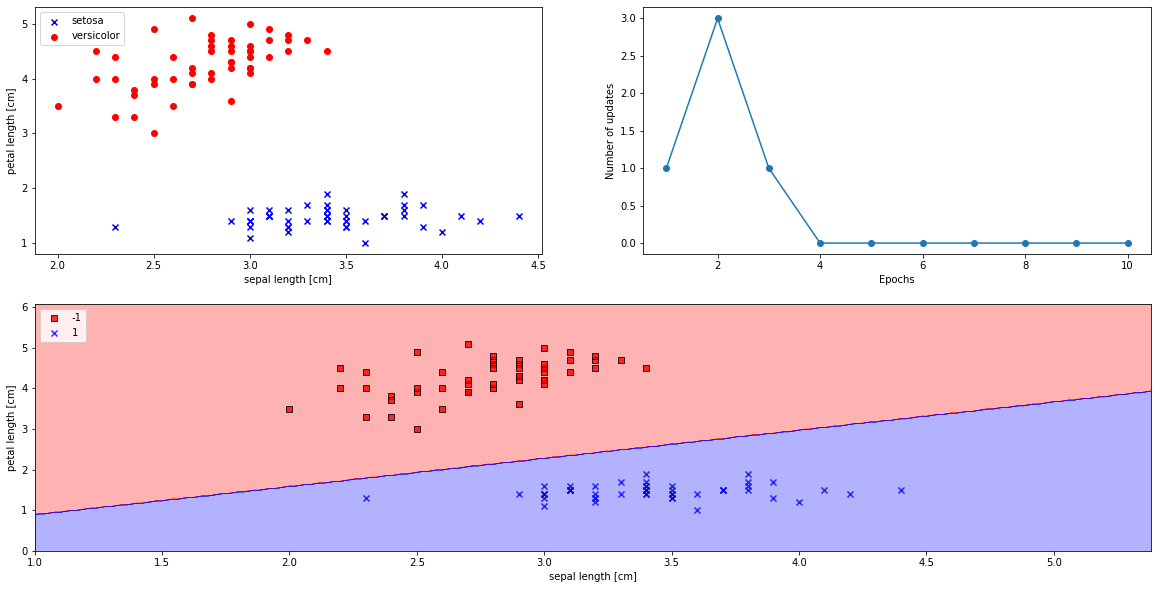

In [24]:
main()